#                                 PUBG Explaratory Data Analysis

![pubg](https://user-images.githubusercontent.com/13174586/48706353-01eaac00-ec22-11e8-9800-5bd0f645ad9f.jpg)

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random

## Import Data

In [2]:
data= pd.read_csv("C:/Users/Mahaveer/Desktop/train_V2.csv")

In [3]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
#Details of the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
data["groupId"].value_counts()
data["matchId"].value_counts()

e12cf2699dfc7f    100
78166788bf9e47    100
de300f0a1bc29e    100
19d298c50c8ae5    100
11d5e84d6c3b5c    100
                 ... 
39d2800dad8ae6      6
9f2b49358564ea      6
8aa5066c4b6a79      5
e5a77433bc436f      2
224a123c53e008      1
Name: matchId, Length: 47965, dtype: int64

In [6]:
#Dimension of the data
data.shape

(4446966, 29)

#### Check if the matchID and Group ID has any correlation with the Win Place % as people might get into an easy lobby or might be grouped with a good Squad or in Duo


In [7]:
df=pd.DataFrame()
df[["groupId","matchId", "winPlacePerc"]]= pd.DataFrame(data[["groupId","matchId", "winPlacePerc"]].copy())

#Converting strings to categorical codes
df["groupId"]= df["groupId"].astype('category').cat.codes
df["matchId"]= df["matchId"].astype('category').cat.codes
df["winPlacePerc"]= df["winPlacePerc"].astype('category').cat.codes

#Check Correlation
df.corr()

#The correlation matrix does not show any relation

,groupId,matchId,winPlacePerc
groupId,1.000000,0.000056,0.000408
matchId,0.000056,1.000000,0.000180
winPlacePerc,0.000408,0.000180,1.000000


In [8]:
list(data.columns.values)

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

#### Dropping "Id", "groupId", "matchId" from the dataframe

In [9]:
data=data.drop(data[["Id", "groupId", "matchId"]], axis=1)
data.columns.values

array(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
       'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'], dtype=object)

In [10]:
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


#### Check the correlation matrix

In [11]:
cor= data.corr()
cor.style.background_gradient().set_precision(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.00,0.31,0.41,0.30,0.20,0.23,-0.29,0.04,0.32,0.24,0.26,-0.02,-0.15,-0.15,-0.02,0.20,0.11,0.01,0.02,0.01,0.06,0.29,0.24,0.02,0.30
boosts,0.31,1.00,0.52,0.36,0.33,0.54,-0.55,0.01,0.50,0.41,0.42,0.07,-0.01,-0.01,0.02,0.25,0.33,0.04,0.11,0.01,0.09,0.64,0.41,-0.01,0.63
damageDealt,0.41,0.52,1.00,0.74,0.61,0.34,-0.68,0.05,0.89,0.70,0.56,-0.01,-0.04,-0.04,-0.00,0.26,0.14,0.05,0.04,0.02,0.08,0.40,0.35,0.02,0.44
DBNOs,0.30,0.36,0.74,1.00,0.47,0.27,-0.56,0.04,0.71,0.65,0.45,-0.01,-0.27,-0.27,-0.00,0.30,0.10,0.04,0.02,0.07,0.06,0.28,0.22,0.01,0.28
headshotKills,0.20,0.33,0.61,0.47,1.00,0.20,-0.47,0.02,0.67,0.51,0.45,-0.02,0.01,0.01,0.01,0.15,0.08,0.01,0.03,0.01,0.04,0.25,0.22,0.00,0.28
heals,0.23,0.54,0.34,0.27,0.20,1.00,-0.39,-0.00,0.31,0.27,0.26,0.11,-0.06,-0.06,0.02,0.24,0.30,0.02,0.08,0.04,0.06,0.43,0.31,-0.01,0.43
killPlace,-0.29,-0.55,-0.68,-0.56,-0.47,-0.39,1.00,-0.02,-0.73,-0.81,-0.54,-0.01,0.02,0.02,-0.01,-0.27,-0.24,-0.06,-0.09,-0.04,-0.07,-0.59,-0.49,-0.00,-0.72
killPoints,0.04,0.01,0.05,0.04,0.02,-0.00,-0.02,1.00,0.04,0.04,0.01,-0.10,-0.04,-0.04,-0.98,0.01,-0.03,-0.00,-0.00,-0.04,-0.01,0.00,-0.00,0.98,0.01
kills,0.32,0.50,0.89,0.71,0.67,0.31,-0.73,0.04,1.00,0.80,0.60,-0.03,-0.00,-0.00,0.01,0.25,0.11,0.06,0.04,0.02,0.08,0.37,0.34,0.01,0.42
killStreaks,0.24,0.41,0.70,0.65,0.51,0.27,-0.81,0.04,0.80,1.00,0.52,-0.03,-0.04,-0.04,0.00,0.24,0.10,0.07,0.03,0.03,0.06,0.33,0.28,0.01,0.38


#### Creating Buckets for the players based on WinPlacePerc variable
#### Quartile 1 - Top 25% of the Players - 75-100 %ile
#### Quartile 2 - 50-75 %ile
#### Quartile 3 - 25-50 %ile
#### Quartile 4 - 0-25 %ile - Noobs :-P

In [12]:
data['WinPlaceBucket'] = np.where(data.winPlacePerc >0.75, 'Quartile1', 
                          np.where(data.winPlacePerc>.5, 'Quartile2', 
                                   np.where(data.winPlacePerc>.25, 'Quartile3', 'Quartile4')))
data[["winPlacePerc","WinPlaceBucket"]]

,winPlacePerc,WinPlaceBucket
0,0.4444,Quartile3
1,0.6400,Quartile2
2,0.7755,Quartile1
3,0.1667,Quartile4
4,0.1875,Quartile4
...,...,...
4446961,0.1786,Quartile4
4446962,0.2935,Quartile3
4446963,0.4815,Quartile3
4446964,0.8000,Quartile1


#### Scatter Plot of all the variables to see their relationships

C:\Users\Mahaveer\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


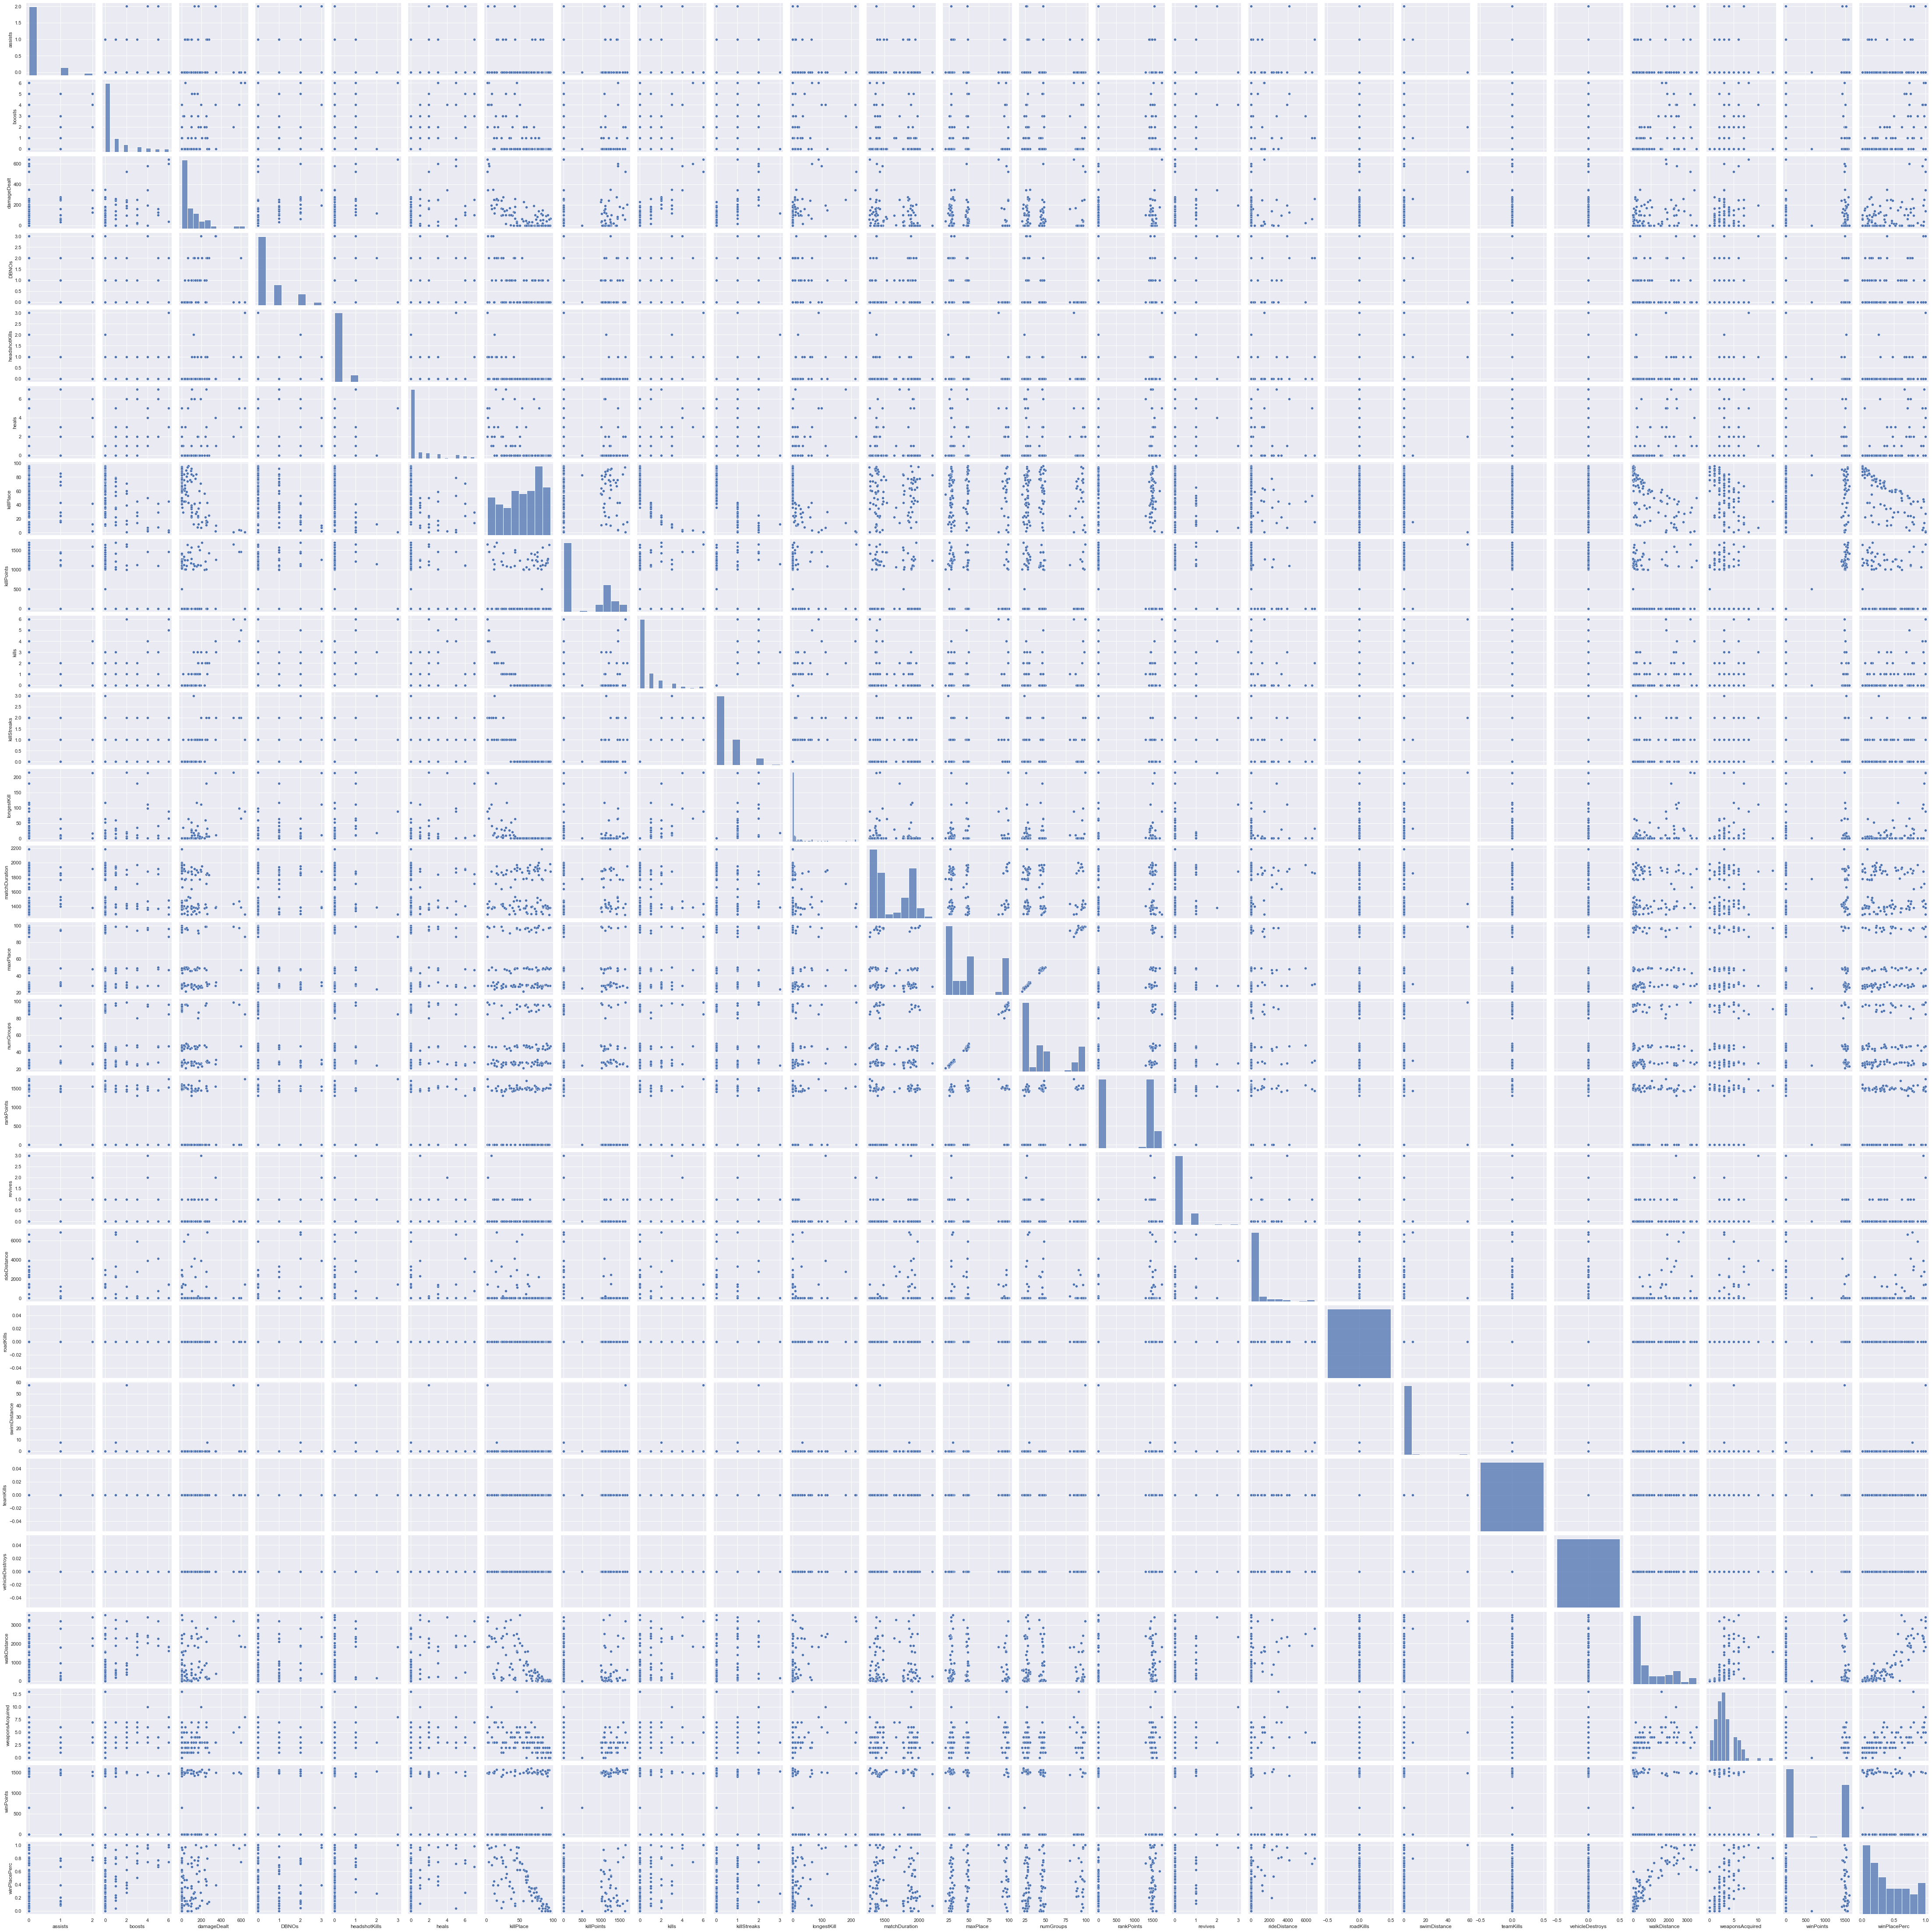

In [13]:
sns.pairplot(data.sample(100), size = 2.5) #hue="WinPlaceBucket"

In [14]:
data.columns.values

array(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
       'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'WinPlaceBucket'],
      dtype=object)

#### We checked the correlation matrix above
#### Using scatter plot for the variables correlated with Winning Percentage to find if there is any linear relationship
#### Note: Correlation is not causation

C:\Users\Mahaveer\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


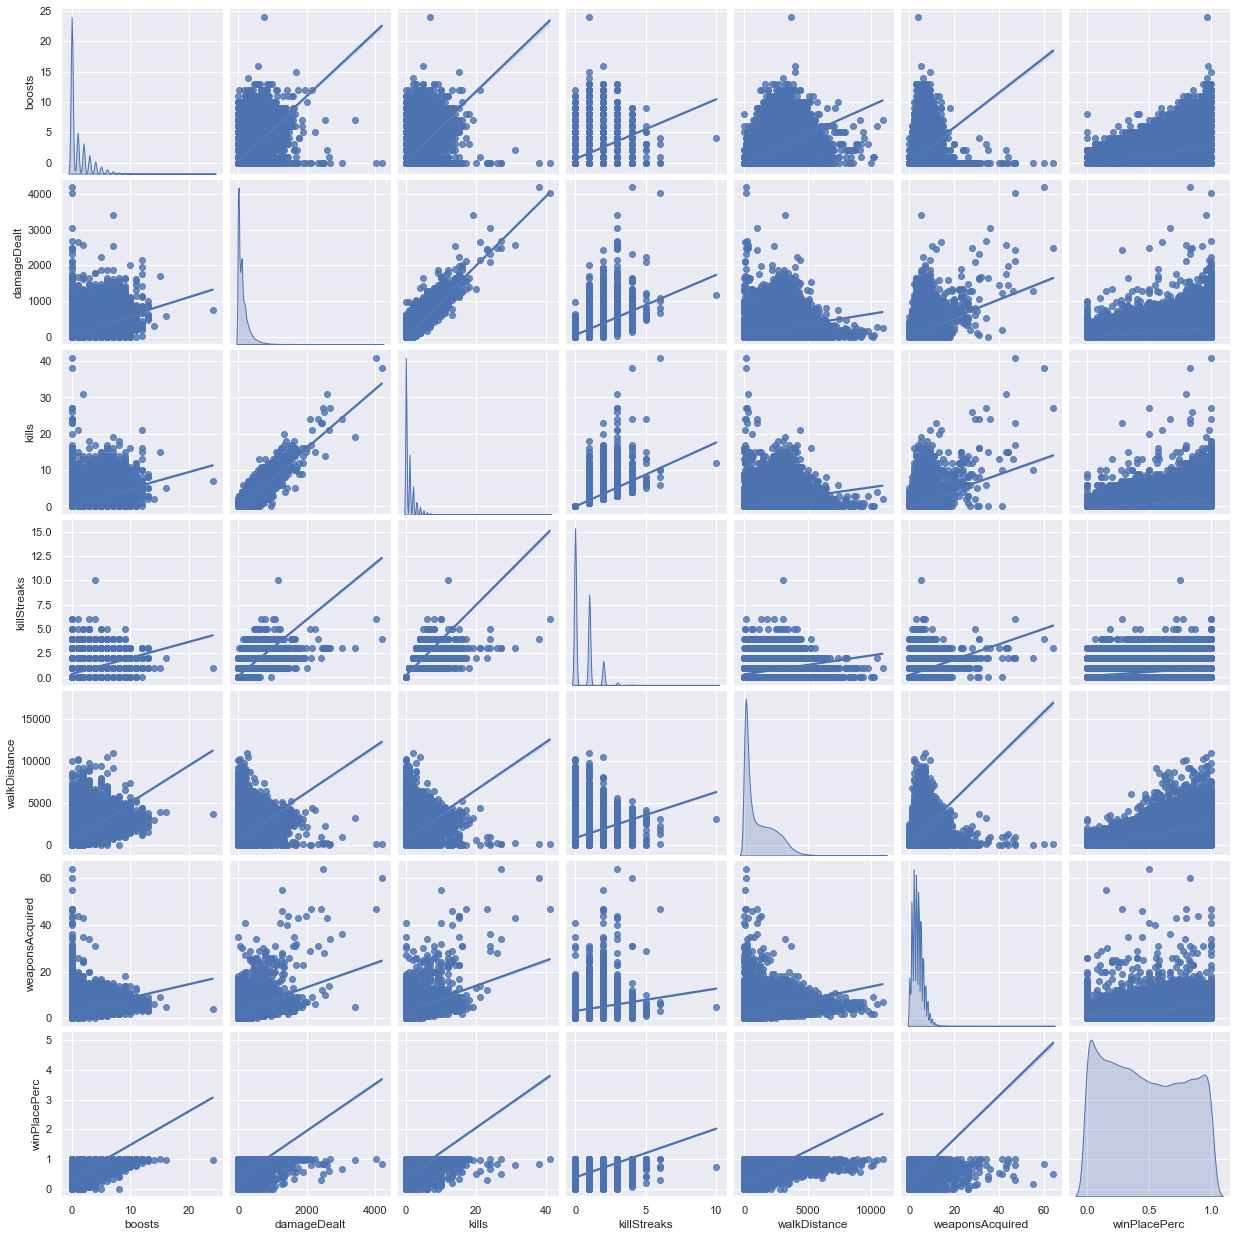

In [15]:
col=["boosts", "damageDealt", "kills", "killStreaks", "walkDistance", "weaponsAcquired","winPlacePerc"]
sns.pairplot(data[col].sample(100000), size = 2.5, kind="reg", diag_kind="kde")

### Check Counts of the palyers belonging to each quartile

![flat 550x550 075 f](https://user-images.githubusercontent.com/13174586/48707380-462b7b80-ec25-11e8-96f0-41083b3d7319.jpg)

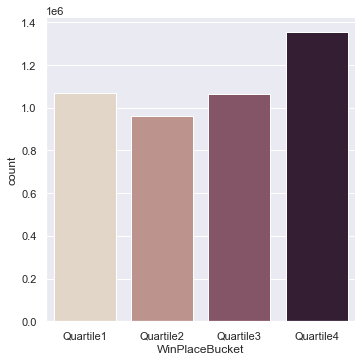

In [16]:
sns.catplot(x="WinPlaceBucket", kind="count", palette="ch:.25", data=data.sort_values("WinPlaceBucket"))

### Check the relationship between WalkDistance, SwimDistance, and RideDistance with Kills based on WinPlace Quartile
![download](https://user-images.githubusercontent.com/13174586/48707564-e5e90980-ec25-11e8-82e3-e3d36c85cbf0.jpg)
![download 1](https://user-images.githubusercontent.com/13174586/48707565-e5e90980-ec25-11e8-8135-ee1bf7e994c0.jpg)
![images](https://user-images.githubusercontent.com/13174586/48707568-e681a000-ec25-11e8-8a35-ed3db2a3816e.jpg)
![images 1](https://user-images.githubusercontent.com/13174586/48707563-e5507300-ec25-11e8-824e-c439f89f482e.jpg)


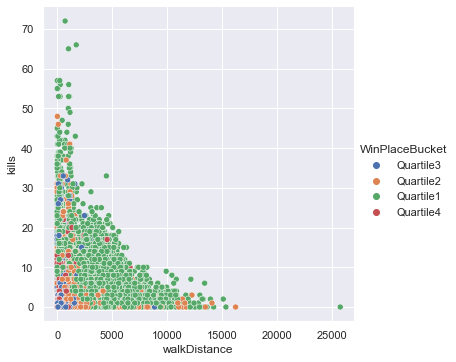

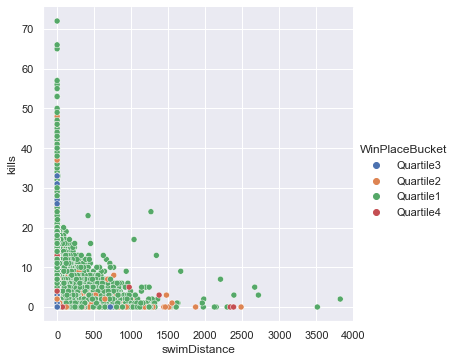

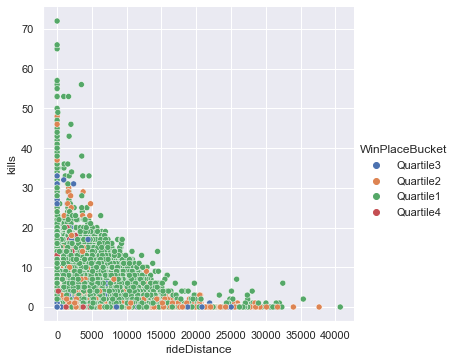

In [17]:
sns.relplot(x="walkDistance", y="kills", hue="WinPlaceBucket", data=data)
sns.relplot(x="swimDistance", y="kills", hue="WinPlaceBucket", data=data)
sns.relplot(x="rideDistance", y="kills", hue="WinPlaceBucket", data=data)

#### Plot1: Mostly the top Quartile players prefer camping and kill. They may travel only to move to the safe zone
#### Plot2: Most of the players avoid swimming as it makes them the most vulnerable to attacks
#### Plot3:  Similar to plot 1, the players avoid riding to much as they get easily exposed to enemy fires and even their vecicles can explode. They prefer to travel only when they are far away from the safe zone after being deployed or if they are far away from the safe zone and it starts shrinking


### Check the relationship between WalkDistance, and RideDistance with Weapons Acquired based on WinPlace Quartile

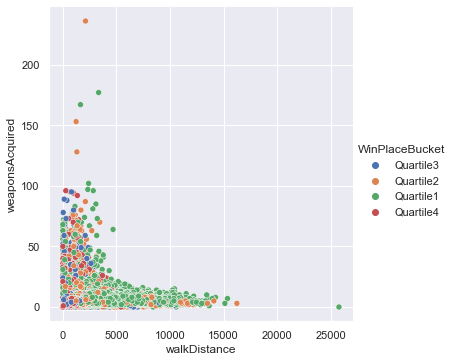

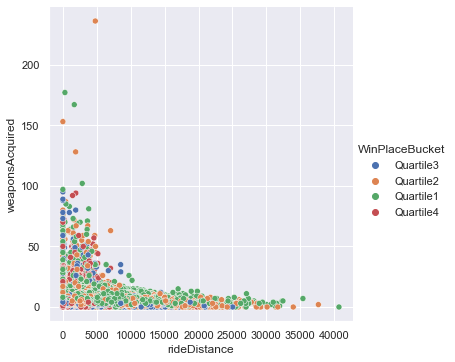

In [18]:
sns.relplot(x="walkDistance", y="weaponsAcquired", hue="WinPlaceBucket", data=data)
sns.relplot(x="rideDistance", y="weaponsAcquired", hue="WinPlaceBucket", data=data)

#### Generally Top Quartile Players does not focus much on scavenging too weapons and attachments. They require basic components like, good automatic guns, scopes, grenades, smoke. They mostly travel for changing camping locations and move to safe zones. It's all skills that matter

### Check the relationship between DBNOs with Weapons Acquired based on WinPlace Quartile and kills with WinPlace Quartile

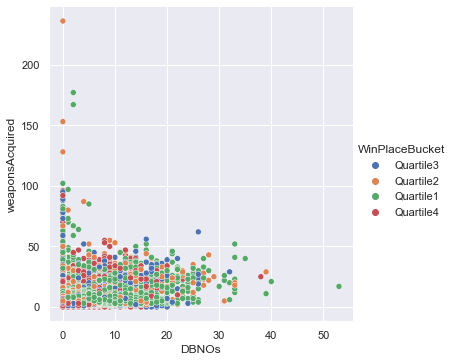

In [19]:
sns.relplot(x="DBNOs", y="weaponsAcquired", hue="WinPlaceBucket", data=data)

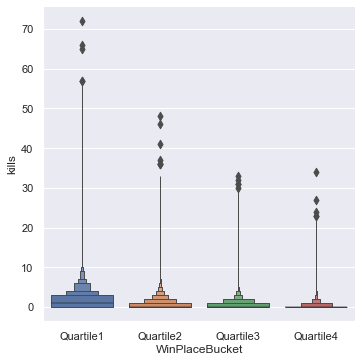

In [20]:
sns.catplot(x="WinPlaceBucket", y="kills", kind="boxen",
            data=data.sort_values("WinPlaceBucket"))

In [21]:
#data.columns.values
data["matchType"].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

### Create bucket for Kills:
![unsunggrizzledhornedviper-size_restricted](https://user-images.githubusercontent.com/13174586/48753002-0bbbf000-ecb2-11e8-9194-05b64565682d.gif)
#### Kill: 0
#### Kill: 1
#### Kills: 2
#### Kills: 3 to 5
#### Kills: 6 to 10
#### Kills: 10+

In [22]:
data['KillsBucket'] = np.where(data.kills >10, 'Kills:10+', 
                          np.where(data.kills>5, 'Kills:6 to 10', 
                                   np.where(data.kills>=3, 'Kills:3 to 5', 
                                            np.where(data.kills==2, 'Kills:2', 
                                                     np.where(data.kills==1, 'Kill:1', 'Kill:0')))))

In [23]:
data["KillsBucket"].value_counts()

Kill:0           2529722
Kill:1            928079
Kills:2           472466
Kills:3 to 5      423561
Kills:6 to 10      84798
Kills:10+           8340
Name: KillsBucket, dtype: int64

#### The players with 10+ Kilss are Pro they most of the time finish with Win Place Percentage of almost 100%. Similarly players with 6 to 10 Kills gives good fight and also mostly end up in the to quartile with median win place as asound 92%. Players with 0 or 1 kills are the one who mostly fight to survive. These are the kind of players who avoids gunfights and keeps of hiding until they are spotted by enemies or end up in  a very small safe zone  

In [ ]:
sns.catplot(x="winPlacePerc", y="KillsBucket", kind="boxen",
            data=data.sort_values("KillsBucket"))

In [ ]:
sns.relplot(x="walkDistance", y="KillsBucket", hue="WinPlaceBucket", data=data)
sns.relplot(x="swimDistance", y="KillsBucket", hue="WinPlaceBucket", data=data)
sns.relplot(x="rideDistance", y="KillsBucket", hue="WinPlaceBucket", data=data)

### Relation between Heals and Boosts
![maxresdefault](https://user-images.githubusercontent.com/13174586/48753435-f5af2f00-ecb3-11e8-9c7b-45cd1a9ff9e6.jpg)
#### Heals
![download 2](https://user-images.githubusercontent.com/13174586/48753424-ecbe5d80-ecb3-11e8-80f7-1c24b712d60b.jpg)
#### Boosts
![download 3](https://user-images.githubusercontent.com/13174586/48753452-0c558600-ecb4-11e8-8af4-ff2c1811a522.jpg)
#### Boosts are always required for inflicting more damage to opponents and run faster. It mostly helps in attacks
#### Heals are required to treat the palyer himself when dealt with wounds or too much damage. We can see drop in win percentage with high heal usage. This typically happens when palyers enter in combat or being spotted while entering safe zone at the near end moments

In [ ]:
random.seed(120)
sns.pointplot(x="boosts", y="winPlacePerc", data=data.sample(1000), color="maroon")
sns.pointplot(x="heals", y="winPlacePerc", data=data.sample(1000), color="purple")
plt.text(14,0.5,"heals", color="purple")
plt.text(14,0.4,"boosts", color="maroon")
plt.xlabel("Heals/Boosts")
plt.ylabel("Win Place %")

### SOLO v DUO v SQUAD
![download 4](https://user-images.githubusercontent.com/13174586/48754523-f053e380-ecb7-11e8-9004-c18abe13794f.jpg)
![download 5](https://user-images.githubusercontent.com/13174586/48754525-f21da700-ecb7-11e8-8155-6b348b613d49.jpg)
![download 6](https://user-images.githubusercontent.com/13174586/48754526-f3e76a80-ecb7-11e8-8104-c5edd52f5ec9.jpg)


In [ ]:
data['GroupBucket'] = np.where(data.numGroups >50, 'Solo', 
                          np.where(data.numGroups>25 , 'Duo', 'Squad'))
data["GroupBucket"].value_counts()

In [ ]:
sns.relplot(x="kills", y="winPlacePerc", hue="GroupBucket", kind="line", data=data)

### Relation between Vehicle Destroys, Kills and Win Place
![images 2](https://user-images.githubusercontent.com/13174586/48754611-4aed3f80-ecb8-11e8-9499-3b782106f5f6.jpg)

In [ ]:
sns.relplot(x="vehicleDestroys", y="winPlacePerc", kind="line",ci="sd", data=data)
sns.relplot(x="vehicleDestroys", y="kills", kind="line",ci="sd", data=data)
sns.relplot(x="vehicleDestroys", y="kills", kind="line",ci=None, hue="WinPlaceBucket", data=data)

In [ ]:
data.columns.values

In [ ]:
data_v2= data.drop(data[["matchDuration", "matchType", "maxPlace", "rankPoints", "WinPlaceBucket",
                        "KillsBucket", "GroupBucket"]], axis=1)

In [ ]:
data_v2.columns.values

In [ ]:
data_v2.info()

## Building Predictive Models

### Regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as split

In [ ]:
train, test= split(data_v2, test_size=0.2, random_state=123)

In [ ]:
train_y= train["winPlacePerc"].copy()
test_y= test["winPlacePerc"].copy()

In [ ]:
train_x=train.drop(train[["winPlacePerc"]],axis=1)
test_x=test.drop(test[["winPlacePerc"]],axis=1)

#### Check for NAN

In [ ]:
print("train_x: ", np.isnan(train_x).any())
print("train_y: ",np.isnan(train_y).any())
print("test_x: ",np.isnan(test_x).any())
print("test_y: ",np.isnan(test_y).any())

#### Missing Values in: 
### test_Y
#### Will impute with mean

In [ ]:
test_y=test_y.fillna(test_y.mean())

In [ ]:
#Check again
print("test_y: ",np.isnan(test_y).any())

#### Create Regression model object

In [ ]:
reg= linear_model.LinearRegression()

In [ ]:
reg.fit(train_x, train_y)

In [ ]:
#Predicting the test set
test_y_pred= reg.predict(test_x)

#### Print Regression Coefficients

In [ ]:
list(zip(train.columns.values,reg.coef_))

#### Mean Squared Error

In [ ]:
mse= mean_squared_error(test_y_pred,test_y)
print("Mean Squared Error: ",mse)

#### Explained Variance- R-Squared

In [ ]:
r2_score(test_y_pred,test_y)

In [ ]:
test_actual= pd.read_csv("../input/test_V2.csv")

In [ ]:
test_actual.head()

In [ ]:
test_model= test_actual.drop(test_actual[["Id", "groupId", "matchId", "matchDuration", "matchType", "maxPlace", "rankPoints"]], axis=1)

In [ ]:
test_model_predict= reg.predict(test_model)

In [ ]:
test_model_predict

In [ ]:
op= pd.DataFrame(list(zip(test_actual["Id"], test_model_predict)))

In [ ]:
op= op.rename(columns={0: 'Id', 1: 'winPlacePerc'})

In [ ]:
op.head()

In [ ]:
op.to_csv("sample_submission.csv", encoding='utf-8', index=False)